In [1]:
!pip install matplotlib 
!conda install matplotlib 
!pip install matplotlib --upgrade
!pip show 
!pip install -U plotly

import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::astropy==4.3.1=py39hf9932de_0
  - defaults/osx-64::anaconda==2021.11=py39_0
  - defaults/osx-64::scikit-image==0.18.3=py39hae1ba45_0
  - defaults/noarch::seaborn==0.11.2=pyhd3eb1b0_0
  - defaults/osx-64::matplotlib==3.4.3=py39hecd8cb5_0
done

## Package Plan ##

  environment location: /Users/chaeeunkim/opt/anaconda3

  added / updated specs:
    - matplotlib


The following NEW packages will be INSTALLED:

  _anaconda_depends  pkgs/main/osx-64::_anaconda_depends-2021.11-py39_0
  matplotlib-base    pkgs/main/osx-64::matplotlib-base-3.4.3-py39h0a11d32_0

The following packages will be UPDATED:

  certifi                          2021.10.8-py39hecd8cb5_0 --> 2021.10.8-py39hecd8cb5_2
  openssl                                 1.1.1l-h9ed2024_0 --> 1.1.1m-hca72f7f_0

The following packages will be DOWNGRADED:

  anaconda

In [2]:
!pip install plotly_express
import plotly.express as px

In [14]:
color_df = pd.read_csv("color.csv")
color_df.head()

,customer_state,color
0,MA,blue
1,AL,blue
2,PI,blue
3,BA,blue
4,CE,blue


In [13]:
location_df = pd.read_csv("location.csv")
location_df.head()

,customer_state,lat,lon
0,MA,-5.230314,-45.297305
1,AL,-9.771043,-36.551456
2,PI,-7.713005,-42.590257
3,BA,-12.345847,-41.715672
4,CE,-5.105881,-39.716620


In [3]:
geolocation = pd.read_csv("time_geolocation.csv")
geolocation.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_timerange,order_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,sao paulo,SP
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.578333,-46.587123,sao paulo,SP
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,sao paulo,SP
3,3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.575033,-46.587451,sao paulo,SP
4,4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.580054,-46.586673,sao paulo,SP


In [17]:
geo = geolocation[['order_timerange', 'customer_city', 'customer_state']]

In [18]:
# 시간별 분석

geo_time = geo.groupby(['order_timerange', 'customer_state']).count()
geo_time = geo_time.rename(columns={'customer_city':'count'})
geo_time = geo_time.reset_index()
geo_time.head()

,order_timerange,customer_state,count
0,0,AC,1270
1,0,AL,3232
2,0,AM,376
3,0,AP,633
4,0,BA,18633


In [19]:
geo_time = pd.merge(geo_time, color_df, left_on='customer_state', right_on='customer_state', how='inner')
geo_time = pd.merge(geo_time, location_df, left_on='customer_state', right_on='customer_state', how='inner')
geo_time.head()

,order_timerange,customer_state,count,color,lat,lon
0,0,AC,1270,green,-8.810877,-70.403135
1,1,AC,413,green,-8.810877,-70.403135
2,2,AC,3368,green,-8.810877,-70.403135
3,3,AC,2434,green,-8.810877,-70.403135
4,0,AL,3232,blue,-9.771043,-36.551456


In [20]:
# 새벽시간대
geo_nig = geo_time[geo_time['order_timerange'] == 0]
geo_nig = geo_nig.sort_values(by='count', axis=0, ascending = False)
geo_nig.head()

,order_timerange,customer_state,count,color,lat,lon
100,0,SP,262881,red,-22.123669,-48.874356
72,0,RJ,155911,red,-22.434646,-42.825171
40,0,MG,102486,red,-18.181009,-44.337467
88,0,RS,35464,orange,-29.478622,-53.355233
68,0,PR,24080,orange,-24.679739,-51.869751


In [21]:
geo_nig.describe()

,order_timerange,count,lat,lon
count,27.0,27.000000,27.000000,27.000000
mean,0.0,25342.444444,-12.520378,-48.439068
std,0.0,58709.119513,8.245113,9.177355
min,0.0,48.000000,-29.478622,-70.403135
25%,0.0,1223.500000,-18.896382,-52.960595
50%,0.0,3529.000000,-10.596470,-48.153114
75%,0.0,16382.500000,-6.493293,-41.178208
max,0.0,262881.000000,1.493050,-36.551456


In [9]:
geo_nig.median()

/var/folders/x8/z8kck_j52x55q_mb_869y11r0000gn/T/ipykernel_803/3654860918.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  geo_nig.median()


order_timerange       0.0
count              3529.0
dtype: float64

In [12]:
import math
import folium

map = folium.Map(location=[-16.236597800139968, -49.280966347478675], zoom_start=4)

for n in geo_nig.index:
    if geo_nig['count'][n] > 100000:
        # 상위 3개 state
        folium.CircleMarker([geo_nig['lat'][n], geo_nig['lon'][n]], 
                        radius = math.log10(geo_nig['count'][n])*5, 
                        label = geo_nig['count'][n],
                        color='red', fill_color='red', fill=True).add_to(map)
    elif geo_nig['count'][n] > 16382.500000:
        # describe에서 75% 값 기준
        folium.CircleMarker([geo_nig['lat'][n], geo_nig['lon'][n]], 
                        radius = math.log10(geo_nig['count'][n])*5, 
                        label = geo_nig['count'][n],
                        color='pink', fill_color='pink', fill=True).add_to(map)
        
    elif geo_nig['count'][n] > 3529.000000:
        # median 기준
        folium.CircleMarker([geo_nig['lat'][n], geo_nig['lon'][n]], 
                        radius = math.log10(geo_nig['count'][n])*5, 
                        label = geo_nig['count'][n],
                        color='orange', fill_color='orange', fill=True).add_to(map)
    else:
        folium.CircleMarker([geo_nig['lat'][n], geo_nig['lon'][n]], 
                        radius = math.log10(geo_nig['count'][n])*5, 
                        label = geo_nig['count'][n],
                        color='yellow', fill_color='yellow', fill=True).add_to(map)
        
map

In [13]:
# 아침시간대

geo_mon = geo_time[geo_time['order_timerange'] == 1]
geo_mon = geo_mon.sort_values(by='count', axis=0, ascending = False)
geo_mon.head()

,order_timerange,customer_state,count,color,lat,lon
101,1,SP,1206933,red,-22.123669,-48.874356
41,1,MG,689001,red,-18.181009,-44.337467
73,1,RJ,627050,red,-22.434646,-42.825171
89,1,RS,162814,orange,-29.478622,-53.355233
69,1,PR,137942,orange,-24.679739,-51.869751


In [14]:
geo_mon.describe()

,order_timerange,count,lat,lon
count,27.0,2.700000e+01,27.000000,27.000000
mean,1.0,1.220506e+05,-12.520378,-48.439068
std,0.0,2.770839e+05,8.245113,9.177355
min,1.0,2.500000e+02,-29.478622,-70.403135
25%,1.0,5.496000e+03,-18.896382,-52.960595
50%,1.0,1.669600e+04,-10.596470,-48.153114
75%,1.0,7.749400e+04,-6.493293,-41.178208
max,1.0,1.206933e+06,1.493050,-36.551456


In [15]:
geo_mon.median()

/var/folders/x8/z8kck_j52x55q_mb_869y11r0000gn/T/ipykernel_1168/2063098562.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  geo_mon.median()


order_timerange        1.000000
count              16696.000000
lat                  -10.596470
lon                  -48.153114
dtype: float64

In [16]:
map = folium.Map(location=[-16.236597800139968, -49.280966347478675], zoom_start=4)

for n in geo_mon.index:
    if geo_mon['count'][n] > 500000:
        folium.CircleMarker([geo_mon['lat'][n], geo_mon['lon'][n]], 
                        radius = math.log10(geo_mon['count'][n])*5, 
                        color='red', fill_color='red', fill=True).add_to(map)
    elif geo_mon['count'][n] > 7.749400e+04:
        folium.CircleMarker([geo_mon['lat'][n], geo_mon['lon'][n]], 
                        radius = math.log10(geo_mon['count'][n])*5, 
                        color='pink', fill_color='pink', fill=True).add_to(map)
        
    elif geo_mon['count'][n] > 16696.000000:
        folium.CircleMarker([geo_mon['lat'][n], geo_mon['lon'][n]], 
                        radius = math.log10(geo_mon['count'][n])*5, 
                        color='orange', fill_color='orange', fill=True).add_to(map)
    else:
        folium.CircleMarker([geo_mon['lat'][n], geo_mon['lon'][n]], 
                        radius = math.log10(geo_mon['count'][n])*5, 
                        color='yellow', fill_color='yellow', fill=True).add_to(map)
        
map

In [17]:
# 오후 시간대

geo_aft = geo_time[geo_time['order_timerange'] == 2]
geo_aft = geo_aft.sort_values(by='count', axis=0, ascending = False)
geo_aft.head()

,order_timerange,customer_state,count,color,lat,lon
102,2,SP,2132895,red,-22.123669,-48.874356
74,2,RJ,1129315,red,-22.434646,-42.825171
42,2,MG,1055697,red,-18.181009,-44.337467
90,2,RS,297710,orange,-29.478622,-53.355233
70,2,PR,243429,orange,-24.679739,-51.869751


In [18]:
geo_aft.describe()

,order_timerange,count,lat,lon
count,27.0,2.700000e+01,27.000000,27.000000
mean,2.0,2.095283e+05,-12.520378,-48.439068
std,0.0,4.797564e+05,8.245113,9.177355
min,2.0,8.580000e+02,-29.478622,-70.403135
25%,2.0,8.123000e+03,-18.896382,-52.960595
50%,2.0,2.642000e+04,-10.596470,-48.153114
75%,2.0,1.239335e+05,-6.493293,-41.178208
max,2.0,2.132895e+06,1.493050,-36.551456


In [19]:
geo_aft.median()

/var/folders/x8/z8kck_j52x55q_mb_869y11r0000gn/T/ipykernel_1168/2793748412.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  geo_aft.median()


order_timerange        2.000000
count              26420.000000
lat                  -10.596470
lon                  -48.153114
dtype: float64

In [20]:
map = folium.Map(location=[-16.236597800139968, -49.280966347478675], zoom_start=4)

for n in geo_aft.index:
    if geo_aft['count'][n] > 1000000:
        folium.CircleMarker([geo_aft['lat'][n], geo_aft['lon'][n]], 
                        radius = math.log10(geo_aft['count'][n])*5, 
                        color='red', fill_color='red', fill=True).add_to(map)
    elif geo_aft['count'][n] > 1.239335e+05	:
        folium.CircleMarker([geo_aft['lat'][n], geo_aft['lon'][n]], 
                        radius = math.log10(geo_aft['count'][n])*5, 
                        color='pink', fill_color='pink', fill=True).add_to(map)
        
    elif geo_aft['count'][n] > 26420.000000:
        folium.CircleMarker([geo_aft['lat'][n], geo_aft['lon'][n]], 
                        radius = math.log10(geo_aft['count'][n])*5, 
                        color='orange', fill_color='orange', fill=True).add_to(map)
    else:
        folium.CircleMarker([geo_aft['lat'][n], geo_aft['lon'][n]], 
                        radius = math.log10(geo_aft['count'][n])*5, 
                        color='yellow', fill_color='yellow', fill=True).add_to(map)
        
map

In [21]:
# 저녁 시간대

geo_eve = geo_time[geo_time['order_timerange'] == 3]
geo_eve = geo_eve.sort_values(by='count', axis=0, ascending = False)
geo_eve.head()

,order_timerange,customer_state,count,color,lat,lon
103,3,SP,1855344,red,-22.123669,-48.874356
75,3,RJ,995225,red,-22.434646,-42.825171
43,3,MG,962335,red,-18.181009,-44.337467
91,3,RS,293216,orange,-29.478622,-53.355233
71,3,PR,204714,orange,-24.679739,-51.869751


In [22]:
geo_eve.describe()

,order_timerange,count,lat,lon
count,27.0,2.700000e+01,27.000000,27.000000
mean,3.0,1.858324e+05,-12.520378,-48.439068
std,0.0,4.217548e+05,8.245113,9.177355
min,3.0,6.400000e+02,-29.478622,-70.403135
25%,3.0,6.422500e+03,-18.896382,-52.960595
50%,3.0,2.047400e+04,-10.596470,-48.153114
75%,3.0,1.153380e+05,-6.493293,-41.178208
max,3.0,1.855344e+06,1.493050,-36.551456


In [23]:
geo_eve.median()

/var/folders/x8/z8kck_j52x55q_mb_869y11r0000gn/T/ipykernel_1168/4072703964.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  geo_eve.median()


order_timerange        3.000000
count              20474.000000
lat                  -10.596470
lon                  -48.153114
dtype: float64

In [24]:
map = folium.Map(location=[-16.236597800139968, -49.280966347478675], zoom_start=4)

for n in geo_eve.index:
    if geo_eve['count'][n] > 900000:
        folium.CircleMarker([geo_eve['lat'][n], geo_eve['lon'][n]], 
                        radius = math.log10(geo_eve['count'][n])*5, 
                        color='red', fill_color='red', fill=True).add_to(map)
    elif geo_eve['count'][n] > 1.153380e+05:
        folium.CircleMarker([geo_eve['lat'][n], geo_eve['lon'][n]], 
                        radius = math.log10(geo_eve['count'][n])*5, 
                        color='pink', fill_color='pink', fill=True).add_to(map)
        
    elif geo_eve['count'][n] > 20474.000000:
        folium.CircleMarker([geo_eve['lat'][n], geo_eve['lon'][n]], 
                        radius = math.log10(geo_eve['count'][n])*5, 
                        color='orange', fill_color='orange', fill=True).add_to(map)
    else:
        folium.CircleMarker([geo_eve['lat'][n], geo_eve['lon'][n]], 
                        radius = math.log10(geo_eve['count'][n])*5, 
                        color='yellow', fill_color='yellow', fill=True).add_to(map)
        
map

In [25]:
# 상위 8개 state만 추출

geo_nig_top = geo_nig[["order_timerange","customer_state","count"]][:8]
geo_mon_top = geo_mon[["order_timerange","customer_state","count"]][:8]
geo_aft_top = geo_aft[["order_timerange","customer_state","count"]][:8]
geo_eve_top = geo_eve[["order_timerange","customer_state","count"]][:8]

# 시간대 모두 병합
total = pd.concat([geo_nig_top,geo_mon_top,geo_aft_top,geo_eve_top],axis=0)

In [14]:
label = ["SP","RJ","MG","RS","PR","SC","BA","ES"]


colors = sns.color_palette('gist_earth',len(label))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}

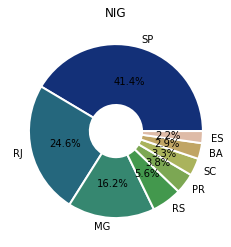

In [26]:
plt.pie(geo_nig_top['count'], labels=label, colors=colors, 
        autopct='%1.1f%%', wedgeprops = wedgeprops)
plt.title('NIG')

plt.savefig('pie_nig.png')

plt.show()

#palette='gist_earth'

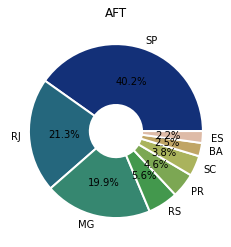

In [27]:
plt.pie(geo_aft_top['count'], labels=label, colors=colors, autopct='%1.1f%%',
       wedgeprops = wedgeprops)
plt.title('AFT')


plt.savefig('pie_aft.png')
plt.show()

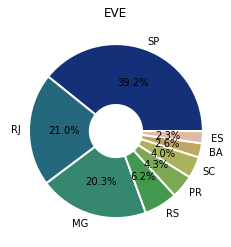

In [28]:
plt.pie(geo_eve_top['count'], labels=label, colors=colors, autopct='%1.1f%%',
       wedgeprops = wedgeprops)
plt.title('EVE')


plt.savefig('pie_eve.png')
plt.show()

In [29]:
# mon에서는 2,3위 순위 변경
mon_cnt = geo_mon_top['count'].copy()
mon_cnt

101    1206933
41      689001
73      627050
89      162814
69      137942
93      110680
17       81500
29       73488
Name: count, dtype: int64

In [30]:
mon_cnt[41] = 627050
mon_cnt[73] = 689001
mon_cnt

101    1206933
41      627050
73      689001
89      162814
69      137942
93      110680
17       81500
29       73488
Name: count, dtype: int64

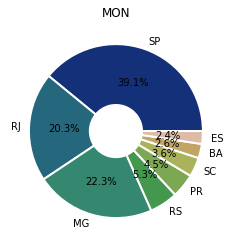

In [31]:
plt.pie(mon_cnt, labels=label, colors=colors, autopct='%1.1f%%',
       wedgeprops = wedgeprops)
plt.title('MON')


plt.savefig('pie_mon.png')
plt.show()

In [32]:
# 시간대별 countplot을 위한 dataframe

geo.head()
geo_sp = geo[geo['customer_state'].str.contains("SP")]
geo_rj = geo[geo['customer_state'].str.contains("RJ")]
geo_mg = geo[geo['customer_state'].str.contains("MG")]
geo_rs = geo[geo['customer_state'].str.contains("RS")]
geo_pr = geo[geo['customer_state'].str.contains("PR")]
geo_sc = geo[geo['customer_state'].str.contains("SC")]
geo_ba = geo[geo['customer_state'].str.contains("BA")]
geo_es = geo[geo['customer_state'].str.contains("ES")]
geo_tot = pd.concat([geo_sp,geo_rj,geo_mg,geo_rs,geo_pr,geo_sc,geo_ba,geo_es],axis=0)

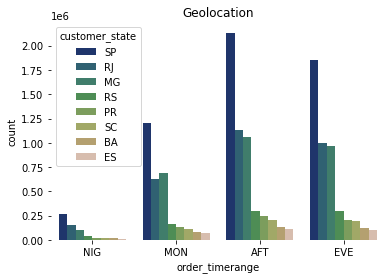

In [33]:
sns.countplot(data=geo_tot, x='order_timerange', hue='customer_state', palette='gist_earth')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.title("Geolocation")
plt.xticks([0,1,2,3],["NIG","MON","AFT","EVE"])
plt.savefig('geo_time.png')
plt.show()

In [6]:
# 요일별 분석

geo3 = geolocation[['order_day', 'customer_city', 'customer_state']]
geo_day = geo3.groupby(['order_day', 'customer_state']).count()
geo_day = geo_day.reset_index()
geo_day.head()

,order_day,customer_state,customer_city
0,0,AC,5555
1,0,AL,26620
2,0,AM,3899
3,0,AP,3862
4,0,BA,278162


In [9]:
geo_day= pd.merge(geo_day, location_df, left_on='customer_state', right_on='customer_state', how='inner')
geo_day = pd.merge(geo_day, color_df, left_on='customer_state', right_on='customer_state', how='inner')
geo_day = geo_day.rename(columns={'customer_city':'count'})
geo_day.head()

,order_day,customer_state,count
0,0,AC,5555
1,0,AL,26620
2,0,AM,3899
3,0,AP,3862
4,0,BA,278162


In [10]:
# 평일 df
geo_week = geo_day[geo_day['order_day'] == 0]
geo_week = geo_week.sort_values(by='count', axis=0, ascending = False)
geo_week.head()

,order_day,customer_state,count
25,0,SP,4181087
18,0,RJ,2228584
10,0,MG,2171623
22,0,RS,606287
17,0,PR,475482


In [11]:
# 주중 df
geo_weekend = geo_day[geo_day['order_day'] == 1]
geo_weekend = geo_weekend.sort_values(by='count', axis=0, ascending = False)
geo_weekend.head()

,order_day,customer_state,count
52,1,SP,1276966
45,1,RJ,678917
37,1,MG,637896
49,1,RS,182917
44,1,PR,134683


In [38]:
geo_week.describe()

,order_day,count,lat,lon
count,27.0,2.700000e+01,27.000000,27.000000
mean,0.0,4.174993e+05,-12.520378,-48.439068
std,0.0,9.485546e+05,8.245113,9.177355
min,0.0,1.418000e+03,-29.478622,-70.403135
25%,0.0,1.683400e+04,-18.896382,-52.960595
50%,0.0,4.868500e+04,-10.596470,-48.153114
75%,0.0,2.571120e+05,-6.493293,-41.178208
max,0.0,4.181087e+06,1.493050,-36.551456


In [39]:
geo_week.median()

/var/folders/x8/z8kck_j52x55q_mb_869y11r0000gn/T/ipykernel_1168/2581997513.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  geo_week.median()


order_day        0.000000
count        48685.000000
lat            -10.596470
lon            -48.153114
dtype: float64

In [40]:
map = folium.Map(location=[-16.236597800139968, -49.280966347478675], zoom_start=4)

for n in geo_week.index:
    if geo_week['count'][n] > 2000000:
        folium.CircleMarker([geo_week['lat'][n], geo_week['lon'][n]], 
                        radius = math.log10(geo_week['count'][n])*5, 
                        color='red', fill_color='red', fill=True).add_to(map)
    elif geo_week['count'][n] > 2.571120e+05:
        folium.CircleMarker([geo_week['lat'][n], geo_week['lon'][n]], 
                        radius = math.log10(geo_week['count'][n])*5, 
                        color='pink', fill_color='pink', fill=True).add_to(map)
        
    elif geo_week['count'][n] > 48685.000000:
        folium.CircleMarker([geo_week['lat'][n], geo_week['lon'][n]], 
                        radius = math.log10(geo_week['count'][n])*5, 
                        color='orange', fill_color='orange', fill=True).add_to(map)
    else:
        folium.CircleMarker([geo_week['lat'][n], geo_week['lon'][n]], 
                        radius = math.log10(geo_week['count'][n])*5, 
                        color='yellow', fill_color='yellow', fill=True).add_to(map)
        
map

In [41]:
geo_weekend.describe()

,order_day,count,lat,lon
count,27.0,2.700000e+01,27.000000,27.000000
mean,1.0,1.252545e+05,-12.520378,-48.439068
std,0.0,2.879170e+05,8.245113,9.177355
min,1.0,3.780000e+02,-29.478622,-70.403135
25%,1.0,4.791500e+03,-18.896382,-52.960595
50%,1.0,1.562000e+04,-10.596470,-48.153114
75%,1.0,7.603600e+04,-6.493293,-41.178208
max,1.0,1.276966e+06,1.493050,-36.551456


In [42]:
geo_weekend.median()

/var/folders/x8/z8kck_j52x55q_mb_869y11r0000gn/T/ipykernel_1168/3205773658.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  geo_weekend.median()


order_day        1.000000
count        15620.000000
lat            -10.596470
lon            -48.153114
dtype: float64

In [43]:
map = folium.Map(location=[-16.236597800139968, -49.280966347478675], zoom_start=4)

for n in geo_weekend.index:
    if geo_weekend['count'][n] > 600000:
        folium.CircleMarker([geo_weekend['lat'][n], geo_weekend['lon'][n]], 
                        radius = math.log10(geo_weekend['count'][n])*5, 
                        color='red', fill_color='red', fill=True).add_to(map)
    elif geo_weekend['count'][n] > 7.603600e+04:
        folium.CircleMarker([geo_weekend['lat'][n], geo_weekend['lon'][n]], 
                        radius = math.log10(geo_weekend['count'][n])*5, 
                        color='pink', fill_color='pink', fill=True).add_to(map)
        
    elif geo_weekend['count'][n] > 15620.000000:
        folium.CircleMarker([geo_weekend['lat'][n], geo_weekend['lon'][n]], 
                        radius = math.log10(geo_weekend['count'][n])*5, 
                        color='orange', fill_color='orange', fill=True).add_to(map)
    else:
        folium.CircleMarker([geo_weekend['lat'][n], geo_weekend['lon'][n]], 
                        radius = math.log10(geo_weekend['count'][n])*5, 
                        color='yellow', fill_color='yellow', fill=True).add_to(map)
        
map

In [12]:
# 상위 8개 도시만 추출

geo_week_top = geo_week[:8]
geo_weekend_top = geo_weekend[:8]

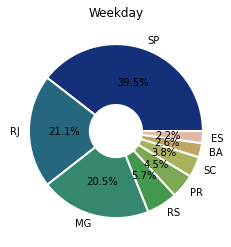

In [15]:
plt.pie(geo_week_top['count'], labels=label, colors=colors, autopct='%1.1f%%',
       wedgeprops = wedgeprops)
plt.title('Weekday')


plt.savefig('pie_week.png')
plt.show()

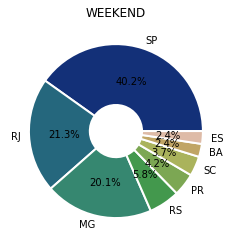

In [46]:
plt.pie(geo_weekend_top['count'], labels=label, colors=colors, autopct='%1.1f%%',
       wedgeprops = wedgeprops)
plt.title('WEEKEND')


plt.savefig('pie_weekend.png')
plt.show()

In [17]:
# countplot을 위한 dataframe

geo.head()
geo_sp2 = geo3[geo3['customer_state'].str.contains("SP")]
geo_rj2 = geo3[geo3['customer_state'].str.contains("RJ")]
geo_mg2 = geo3[geo3['customer_state'].str.contains("MG")]
geo_rs2 = geo3[geo3['customer_state'].str.contains("RS")]
geo_pr2 = geo3[geo3['customer_state'].str.contains("PR")]
geo_sc2 = geo3[geo3['customer_state'].str.contains("SC")]
geo_ba2 = geo3[geo3['customer_state'].str.contains("BA")]
geo_es2 = geo3[geo3['customer_state'].str.contains("ES")]
geo_tot2 = pd.concat([geo_sp2,geo_rj2,geo_mg2,geo_rs2,geo_pr2,geo_sc2,geo_ba2,geo_es2],axis=0)

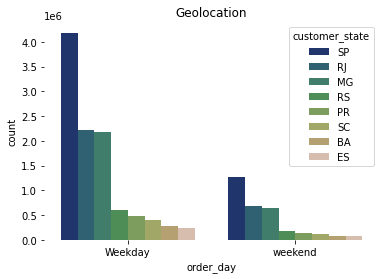

In [18]:
sns.countplot(data=geo_tot2, x='order_day', hue='customer_state', palette='gist_earth')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.title("Geolocation")
plt.xticks([0,1],["Weekday","weekend"])
plt.savefig('geo_day.png')
plt.show()

In [20]:
geo_notime = geolocation[["order_id","order_status","customer_city","customer_state",
                          "geolocation_lat","geolocation_lng"]]

In [21]:
review = pd.read_csv("olist_order_reviews_dataset.csv")
review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [22]:
geo_reviews = pd.merge(geo_notime, review, left_on='order_id', right_on='order_id', how='inner')
geo_reviews.head()

,order_id,order_status,customer_city,customer_state,geolocation_lat,geolocation_lng,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,sao paulo,SP,-23.574809,-46.587471,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,sao paulo,SP,-23.578333,-46.587123,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,sao paulo,SP,-23.574809,-46.587471,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,e481f51cbdc54678b7cc49136f2d6af7,delivered,sao paulo,SP,-23.575033,-46.587451,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
4,e481f51cbdc54678b7cc49136f2d6af7,delivered,sao paulo,SP,-23.580054,-46.586673,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48


In [23]:
bad_review = geo_reviews[geo_reviews["review_score"] < 3]
bad_review.head()

,order_id,order_status,customer_city,customer_state,geolocation_lat,geolocation_lng,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
91,d95ca1fcb72812383e41e2eb7ca65dc2,delivered,barreiras,BA,-12.169860,-44.988369,d38c2458335ad219ac242af5c53a41b7,2,NaN,Eu comprei 4 rádios e so recebi 3. Estou esper...,2017-04-19 00:00:00,2017-04-22 09:51:23
92,d95ca1fcb72812383e41e2eb7ca65dc2,delivered,barreiras,BA,-12.126669,-45.016167,d38c2458335ad219ac242af5c53a41b7,2,NaN,Eu comprei 4 rádios e so recebi 3. Estou esper...,2017-04-19 00:00:00,2017-04-22 09:51:23
93,d95ca1fcb72812383e41e2eb7ca65dc2,delivered,barreiras,BA,-12.128049,-45.008985,d38c2458335ad219ac242af5c53a41b7,2,NaN,Eu comprei 4 rádios e so recebi 3. Estou esper...,2017-04-19 00:00:00,2017-04-22 09:51:23
94,d95ca1fcb72812383e41e2eb7ca65dc2,delivered,barreiras,BA,-12.126651,-45.016161,d38c2458335ad219ac242af5c53a41b7,2,NaN,Eu comprei 4 rádios e so recebi 3. Estou esper...,2017-04-19 00:00:00,2017-04-22 09:51:23
95,d95ca1fcb72812383e41e2eb7ca65dc2,delivered,barreiras,BA,-12.125107,-45.008162,d38c2458335ad219ac242af5c53a41b7,2,NaN,Eu comprei 4 rádios e so recebi 3. Estou esper...,2017-04-19 00:00:00,2017-04-22 09:51:23


In [24]:
bad = bad_review.groupby(['customer_state']).count()
bad.head()

,order_id,order_status,customer_city,geolocation_lat,geolocation_lng,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
customer_state,,,,,,,,,,,
AC,971,971,971,971,971,971,971,164,877,971,971
AL,7869,7869,7869,7869,7869,7869,7869,761,5918,7869,7869
AM,909,909,909,909,909,909,909,227,821,909,909
AP,247,247,247,247,247,247,247,0,177,247,247
BA,63750,63750,63750,63750,63750,63750,63750,8559,46842,63750,63750


In [25]:
bad = pd.merge(bad, color_df, left_on='customer_state', right_on='customer_state', how='inner')
bad.head()

,customer_state,order_id,order_status,customer_city,geolocation_lat,geolocation_lng,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,color
0,AC,971,971,971,971,971,971,971,164,877,971,971,green
1,AL,7869,7869,7869,7869,7869,7869,7869,761,5918,7869,7869,blue
2,AM,909,909,909,909,909,909,909,227,821,909,909,green
3,AP,247,247,247,247,247,247,247,0,177,247,247,green
4,BA,63750,63750,63750,63750,63750,63750,63750,8559,46842,63750,63750,blue


In [26]:
bad = bad.sort_values(by='order_id', axis=0, ascending = False)
bad = bad.reset_index()
bad = bad[["customer_state","order_id","color"]]
bad = bad.rename(columns={'order_id':'bad_review_num'})
bad.head()

,customer_state,bad_review_num,color
0,SP,574978,red
1,RJ,516539,red
2,MG,342308,red
3,RS,89659,orange
4,SC,72179,orange


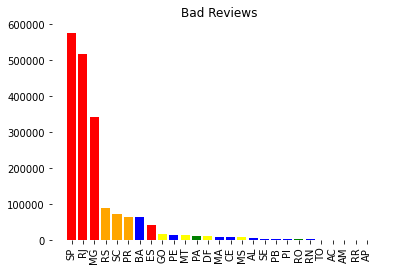

In [28]:
color = list(bad['color'])

plt.bar(data=bad,
        x='customer_state',
        height='bad_review_num',
        color = color)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.xticks(rotation=90)
plt.title('Bad Reviews')
plt.savefig('geo_bad_review.png')
plt.show()

In [29]:
geo_order_num = geo_reviews.groupby(['customer_state']).count()
geo_order_num = geo_order_num.reset_index()
geo_order_num = geo_order_num[["customer_state","order_id"]]
geo_order_num.head()

,customer_state,order_id
0,AC,7485
1,AL,34147
2,AM,5498
3,AP,4741
4,BA,353802


In [30]:
geo_order_num = geo_order_num.sort_values(by='order_id', axis=0, ascending = False)
geo_order_num = geo_order_num.rename(columns={'order_id':'geo_order_num'})
geo_order_num.head()

,customer_state,geo_order_num
25,SP,5459875
18,RJ,2896343
10,MG,2811986
22,RS,792434
17,PR,608681


In [31]:
geo_bad_ratio = pd.merge(bad, geo_order_num, left_on='customer_state', right_on='customer_state', how='inner')
geo_bad_ratio["bad_review_ratio"] = geo_bad_ratio["bad_review_num"] / geo_bad_ratio['geo_order_num']
geo_bad_ratio = geo_bad_ratio.sort_values(by='bad_review_ratio', axis=0, ascending = False)
geo_bad_ratio

,customer_state,bad_review_num,color,geo_order_num,bad_review_ratio
16,AL,7869,blue,34147,0.230445
13,MA,10531,blue,50946,0.206709
17,SE,4442,blue,23699,0.187434
6,BA,63750,blue,353802,0.180186
1,RJ,516539,red,2896343,0.178342
11,PA,13535,green,80325,0.168503
14,CE,10229,blue,60870,0.168047
24,AM,909,green,5498,0.165333
19,PI,3466,blue,22411,0.154656
15,MS,9181,yellow,61077,0.150318


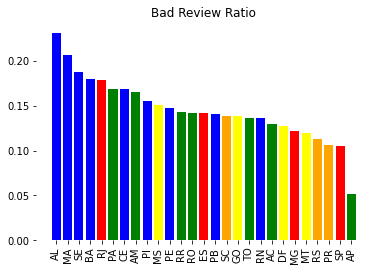

In [32]:
color = list(geo_bad_ratio['color'])

plt.bar(data=geo_bad_ratio,
        x='customer_state',
        height='bad_review_ratio',
       color = color)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.xticks(rotation=90)
plt.title('Bad Review Ratio')
plt.savefig('geo_bad_review_ratio.png')
plt.show()